In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

In [7]:
def removeDup(array, increment):  
    to_remove = set()
    for x in array:
        if x not in to_remove:
            for i in range(1, 1 + increment):
                to_remove.add(x - i)
                to_remove.add(x + i)
                
    final = [x for x in array if x not in to_remove]
    return final

In [150]:
img = cv2.imread('line_segmentation/12.jpg')
# define border color
lower = (0, 80, 110)
upper = (0, 120, 150)

# threshold on border color
mask = cv2.inRange(img, lower, upper)

# dilate threshold
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

# recolor border to white
img[mask==255] = (255,255,255)

# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# otsu threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

# apply morphology open
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph = 255 - morph

# find contours and bounding boxes
words = []
bboxes_img = img.copy()
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
contours = contours[0] if len(contours) == 2 else contours[1]
word_coord = []
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    word_coord.append([x,y,x+w, y+h])
    
    cv2.rectangle(bboxes_img, (x,y), (x+w, y+h), (0,255,0), 2)
    #_roi = img
    roi = img[y:y+h, x:x+w]
    print(roi.shape)
    words.append(roi)

#cv2.imwrite('character_segmentation.jpg', bboxes_img)

#plt.figure(figsize=(15,13))
#plt.imshow(bboxes_img)

(1, 4, 3)
(20, 17, 3)
(20, 17, 3)
(4, 9, 3)
(3, 5, 3)
(37, 69, 3)
(34, 29, 3)
(32, 57, 3)
(34, 75, 3)
(30, 58, 3)
(35, 127, 3)
(32, 107, 3)


In [153]:
word_coord[1]

[1357, 14, 1374, 34]

In [158]:
word_coord.sort(key=lambda x:x[2], reverse=True)

In [159]:
word_coord

[[1388, 0, 1457, 37],
 [1357, 14, 1374, 34],
 [1315, 0, 1344, 34],
 [1246, 0, 1303, 32],
 [1155, 0, 1230, 34],
 [1162, 6, 1167, 9],
 [1125, 14, 1142, 34],
 [1055, 0, 1113, 30],
 [1080, 119, 1084, 120],
 [912, 0, 1039, 35],
 [921, 7, 930, 11],
 [791, 0, 898, 32]]

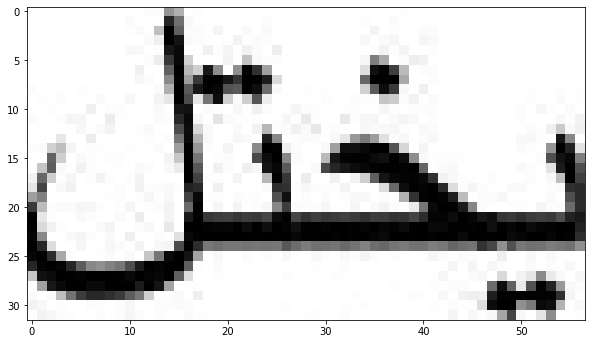

In [147]:
plt.figure(figsize=(10,8))
plt.imshow(words[7])

In [92]:
def wordSegmentation(img):
    # define border color
    lower = (0, 80, 110)
    upper = (0, 120, 150)

    # threshold on border color
    mask = cv2.inRange(img, lower, upper)

    # dilate threshold
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
    mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

    # recolor border to white
    img[mask==255] = (255,255,255)

    # convert img to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # otsu threshold
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

    # apply morphology open
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    morph = 255 - morph

    # find contours and bounding boxes
    words = []
    bboxes_img = img.copy()
    contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
    contours = contours[0] if len(contours) == 2 else contours[1]
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        roi = img[x:x+w, y:y+h]
        words.append(roi)
    
    return words
    #cv2.imwrite('character_segmentation.jpg', bboxes_img)

    #plt.figure(figsize=(15,13))
    #plt.imshow(bboxes_img)

ValueError: zero-size array to reduction operation minimum which has no identity

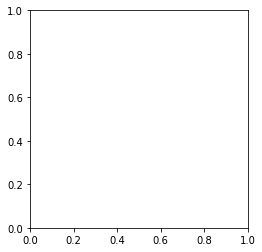

In [93]:
line_words = []

img = cv2.imread('pages/16.jpg')
line_segmentation_coord = []
# define border color
lower = (0, 80, 110)
upper = (0, 120, 150)

# threshold on border color
mask = cv2.inRange(img, lower, upper)
# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# otsu threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph = 255 - morph


bboxes_img = img.copy()
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
contours = contours[0] if len(contours) == 2 else contours[1]
for index, cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.line(bboxes_img, (0, y), (img.shape[1], y), (0,255,0), 2)
    line_segmentation_coord.append(y)
    
cv2.imwrite('sentence-seg.jpg', bboxes_img)

line_segmentation_coord = sorted(list(set(removeDup(line_segmentation_coord, 10))))

line_seg_images = []
for line in range(len(line_segmentation_coord)):
    if line != len(line_segmentation_coord)-1:
        sentence = img[line_segmentation_coord[line]:line_segmentation_coord[line+1], :]
        cv2.imwrite(f'line_segmentation/{line}.jpg', sentence)
    else:
        sentence = img[line_segmentation_coord[line]:, :]
        line_seg_images.append(sentence)
        cv2.imwrite(f'line_segmentation/{line}.jpg', sentence)
        
    word_images = wordSegmentation(sentence)
    for word in word_images:
        line_words.append(word)


# Line Segmentation

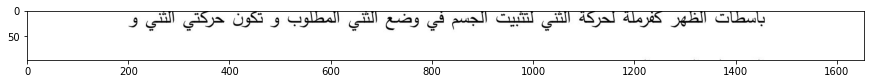

In [61]:
plt.figure(figsize=(15,13))
plt.imshow(line_seg_images[3])

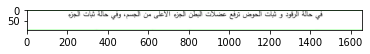

In [20]:
plt.imshow(bboxes_img[214:310 ,:])

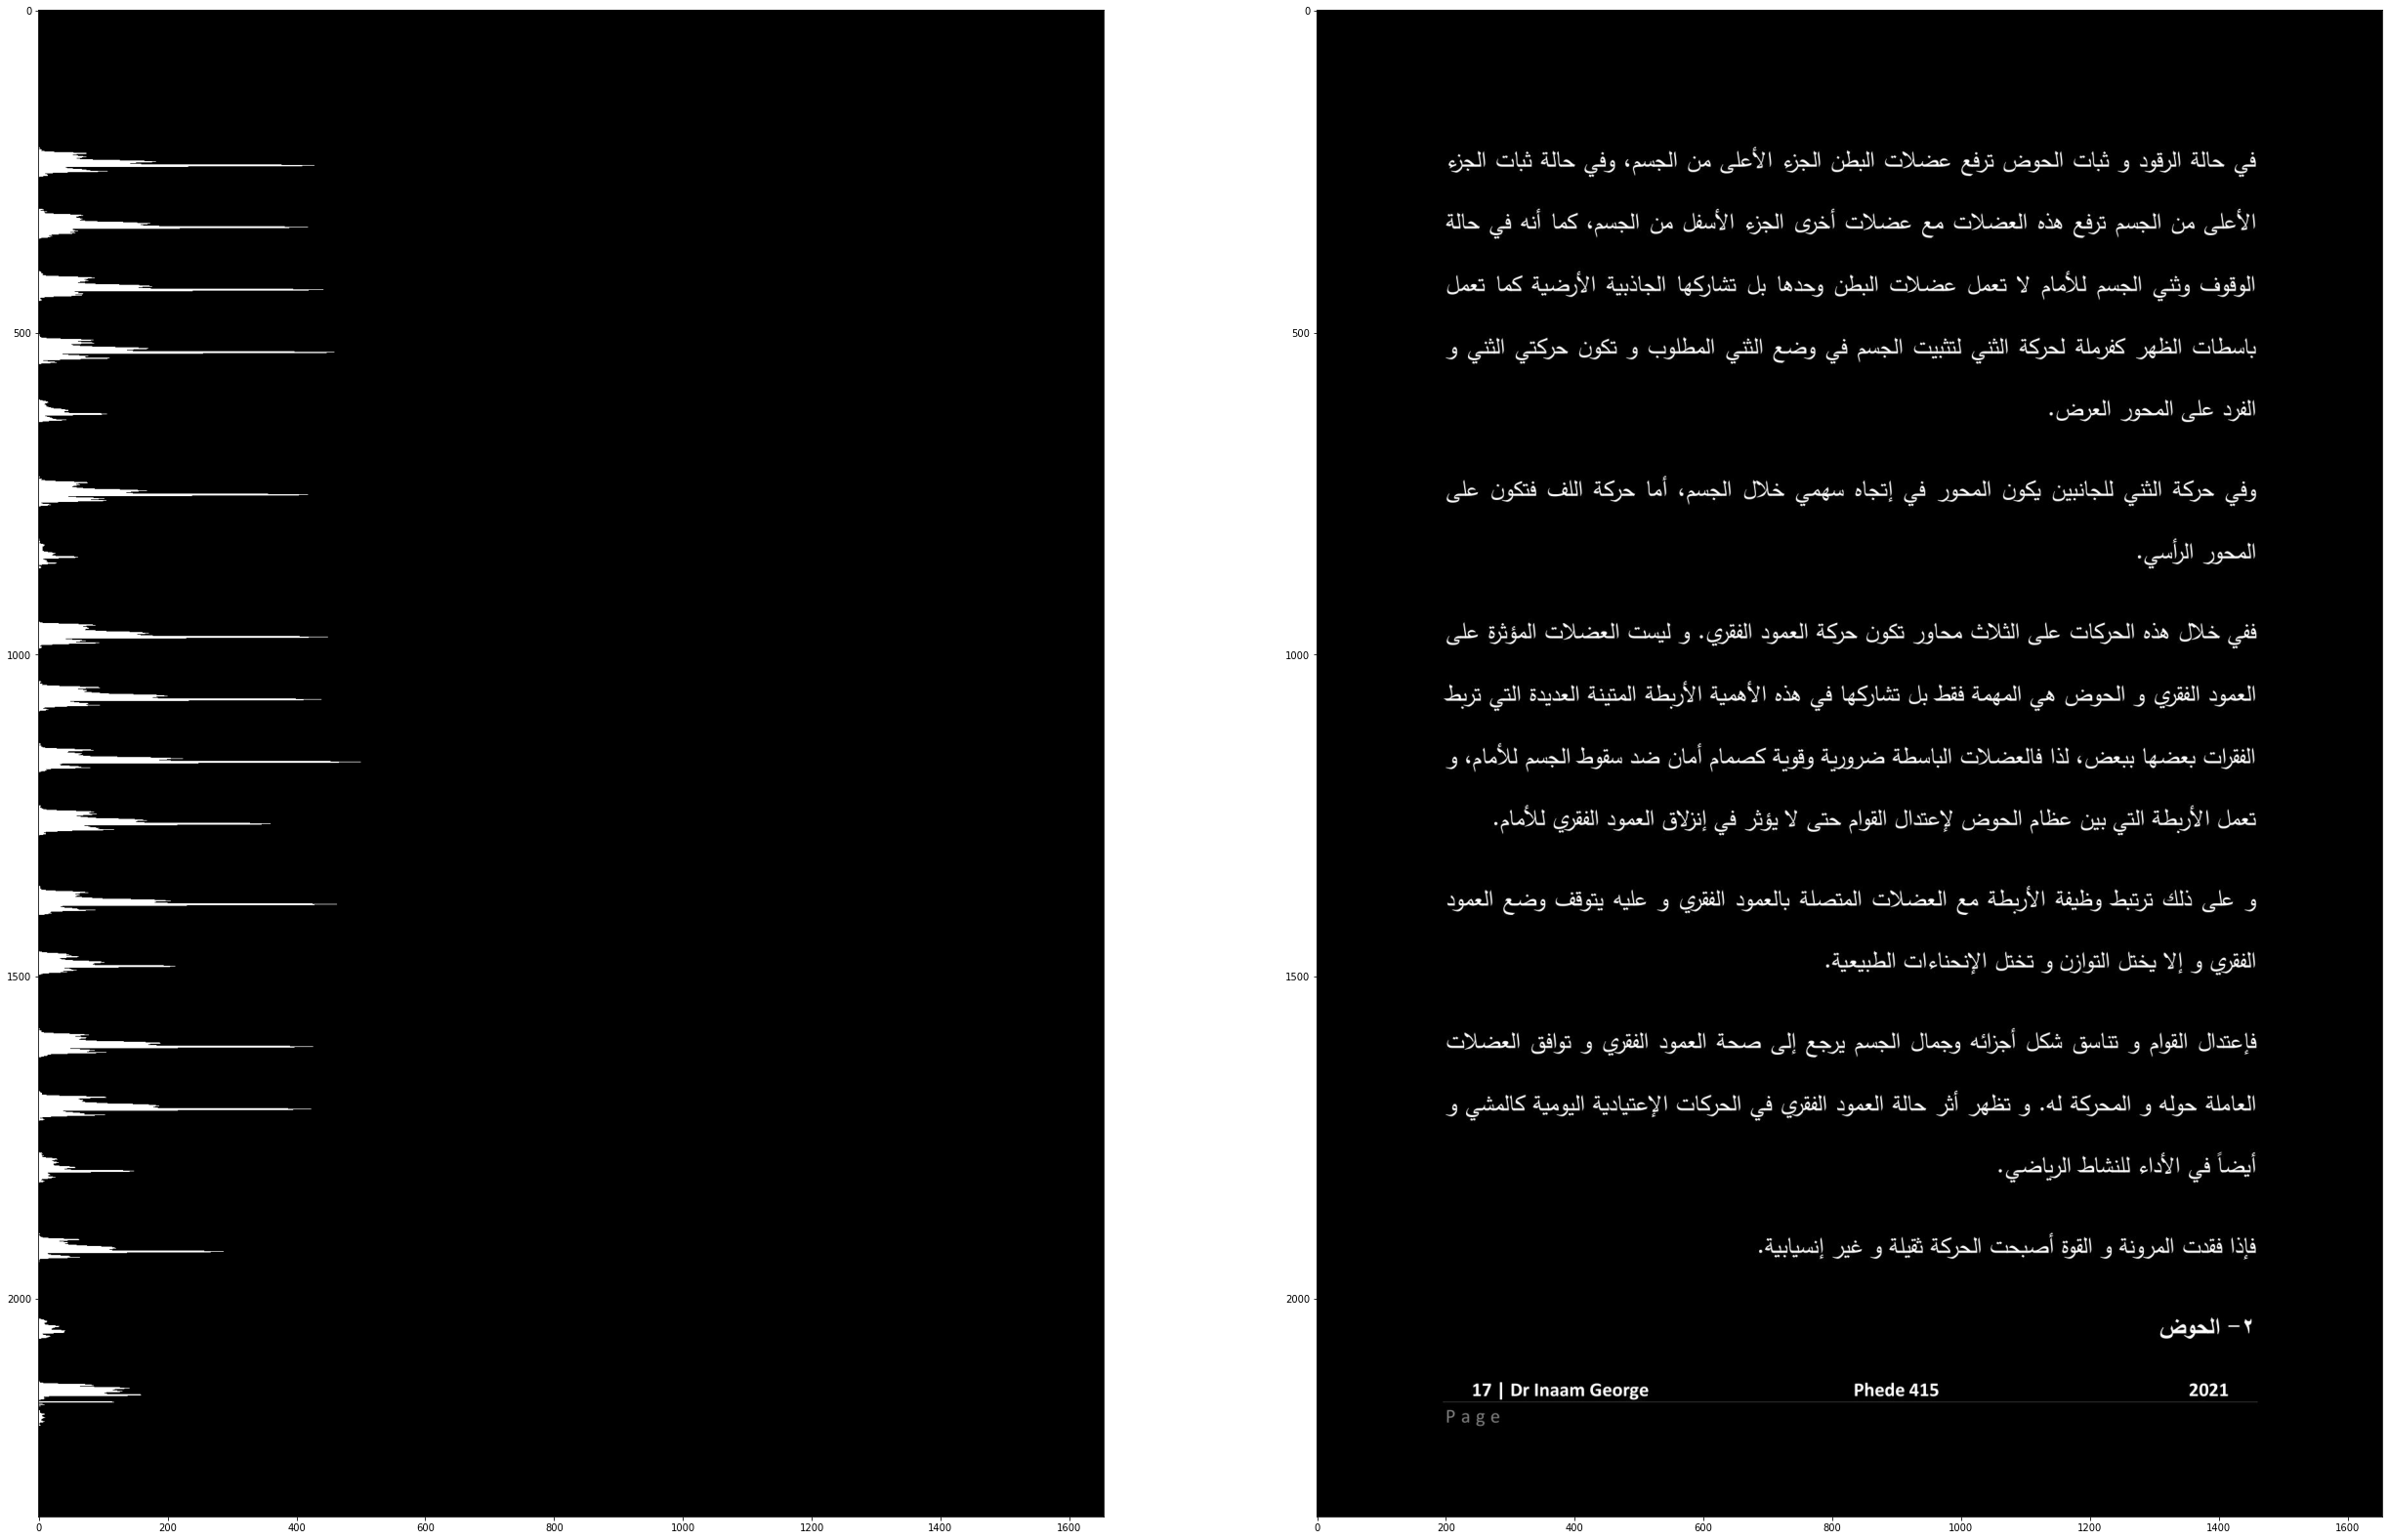

In [19]:
# Load as greyscale
im = cv2.imread('pages/16.jpg', cv2.IMREAD_GRAYSCALE)

# Invert
im = 255 - im

# Calculate horizontal projection
proj = np.sum(im,1)

# Create output 
#image same height as text, 500 px wide
m = np.max(proj)
w = 500
result = np.zeros((proj.shape[0], 1654))

# Draw a line for each row
for row in range(im.shape[0]):
   cv2.line(result, (0,row), (int(proj[row]*w/m),row), (255,255,255), 1)


plt.figure(figsize=(43,60))
plt.subplot(1,2,1)
plt.imshow(result, cmap='gray')


plt.subplot(1,2,2)
plt.imshow(im, cmap='gray')

plt.savefig('line_segmentation.png', facecolor='w', bbox_inches='tight')

# Word Segmentation

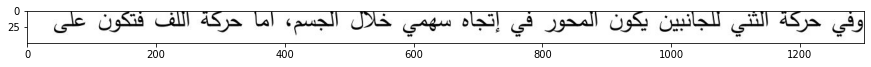

In [34]:
img = cv2.imread('pages/16.jpg')

#cv2.rectangle(img, (160, 730), (1500, 780), (0,255,0), 2)
sentence = img[730:780, 160:160+1300]
cv2.imwrite('sentence.jpg', sentence)
plt.figure(figsize=(15,13))
plt.imshow(sentence)

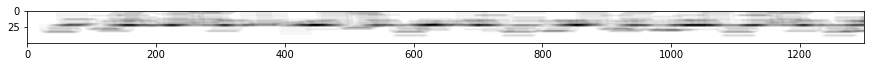

In [78]:
img = cv2.imread('sentence.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY)

blur = cv2.blur(thresh, (50,1), cv2.BORDER_DEFAULT)

dilate = cv2.erode(thresh, (300,50), iterations=50, )

plt.figure(figsize=(15,13))
plt.imshow(blur, cmap='gray')

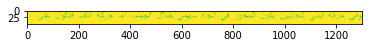

In [69]:
plt.imshow(thresh)

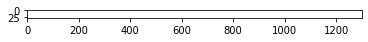

In [65]:
image = cv2.imread("sentence.jpg")
height, width, _ = image.shape

gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, threshold_image = cv2.threshold(gray_scale, 0, 255, cv2.THRESH_BINARY_INV)

vertical_pixel_sum = np.sum(threshold_image, axis=0)
myprojection = vertical_pixel_sum / 255

blankImage = np.zeros_like(image)
for i, value in enumerate(myprojection):
    cv2.line(blankImage, (i, 0), (i, height-int(value)), (255, 255, 255), 10)
    
    
plt.imshow(blankImage)

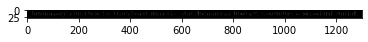

In [60]:
plt.imshow(threshold_image, cmap='gray')

False

In [157]:
above_black_count, below_black_count = blackCalculcate(clean_images[0], baseline, above_baseline_threshold, under_baseline_threshold)

In [173]:
image = images[0]
above = image[:baseline, :][:above_baseline_threshold] 
below = image[baseline:, :][under_baseline_threshold:]
above_black_count = (above.shape[0] * above.shape[1]) - np.count_nonzero(above)
below_black_count = (below.shape[0] * below.shape[1]) - np.count_nonzero(below)


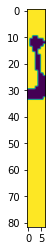

In [172]:
plt.imshow(images[0])

In [168]:
image.shape

(25,)

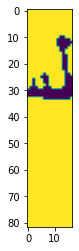

In [155]:
plt.imshow(final_images[0])

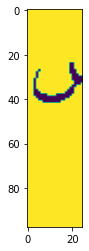

In [140]:
plt.imshow(images[5])

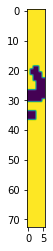

In [81]:
plt.imshow(final_img[0])

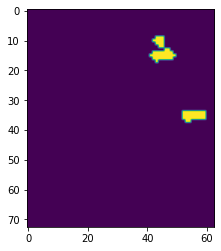

In [46]:
blank = np.zeros((clean.shape))

for row in range(clean.shape[0]):
    for col in range(clean[row].shape[0]):
        if clean[row][col] == 0:
            blank[row][col] = 255
            
plt.imshow(blank)

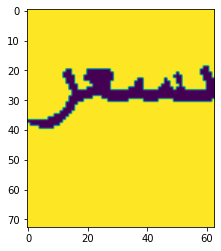

In [27]:
stack_revesed = np.hstack([image for image in reversed(new_images)])
plt.imshow(stack_revesed)

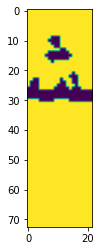

In [284]:
plt.imshow(new_images[1])

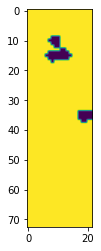

In [285]:
plt.imshow(new_clean[1])

In [277]:
len(new_images)

4

In [237]:
image[0]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255], dtype=uint8)

In [241]:
image[17]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255], dtype=uint8)

In [231]:
image[0].shape

(6,)

In [223]:
clean_images[1].shape

(73, 9)

In [222]:
clean_images[1][0].shape

(9,)

In [214]:
thresh.shape

(73, 63)

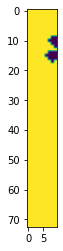

In [219]:
plt.imshow(clean_images[3])

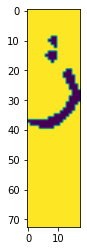

In [201]:
plt.imshow(new_images[3])

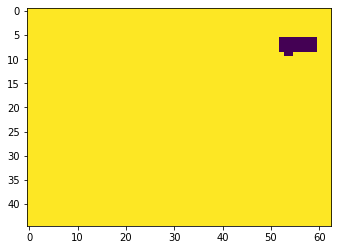

In [177]:
plt.imshow(thresh[baseline:, :])

In [173]:
revered_images = [image for image in reversed(images)]
mm = np.hstack(revered_images)

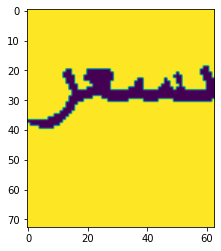

In [174]:
plt.imshow(mm)

In [152]:
image[4].shape

(18,)

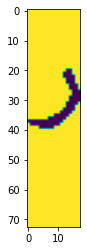

In [151]:
plt.imshow(images[5])

In [137]:
len(new_images)

2

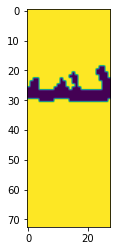

In [128]:
stack = np.hstack([new_images[1], new_images[0]])
plt.imshow(stack)

In [63]:
len(images)

6

In [62]:
index+2

6

In [56]:
index

5

In [54]:
len(clean_images)-2

4

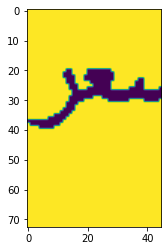

In [51]:
plt.imshow(new_images[2])

In [44]:
len(new_images[2])

73

In [30]:
plt.imshow(images[6])

IndexError: list index out of range

In [296]:
len(images)

6

In [295]:
index

4

In [ ]:
empty_lines

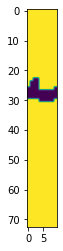

In [176]:
plt.imshow(images[3])

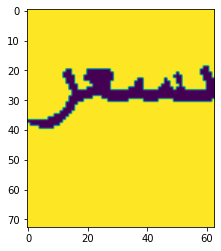

In [177]:
plt.imshow(thresh)

In [140]:
images[0].shape[1]

5

In [109]:
plt.imshow(new_images[0][1])

IndexError: list index out of range

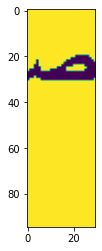

In [87]:
plt.imshow(x)

In [75]:
images[empty].shape[1]

9

In [76]:
images[empty+1].shape[1]

17

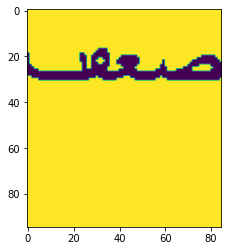

In [74]:
plt.imshow(thresh)

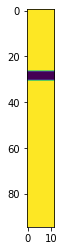

In [82]:
plt.imshow(thresh[:,images[empty].shape[1]:images[empty-1].shape[1]])

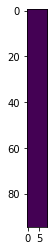

In [53]:
plt.imshow(clean_images[1])

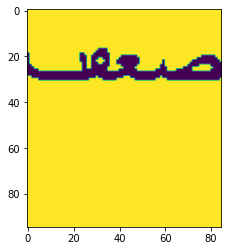

In [55]:
plt.imshow(thresh)

In [23]:
image = cv2.imread('words/14.png')
mask = np.zeros(image.shape, dtype=np.uint8)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

3.5
1.3333333333333333
2613.5
0.8360655737704918
lol
16.5
1.0
lol
4.0
0.75
31.0
1.6666666666666667
lol


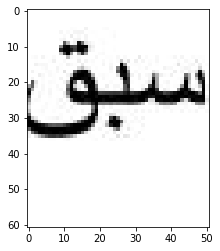

In [30]:
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    area = cv2.contourArea(c)
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.05 * peri, True)
    x,y,w,h = cv2.boundingRect(approx)
    aspect_ratio = w / float(h)
    print(area)
    print(aspect_ratio)
    if area > 10 and aspect_ratio > .5:
        mask[y:y+h, x:x+w] = image[y:y+h, x:x+w]
        
        
plt.imshow(mask)

Both not found!


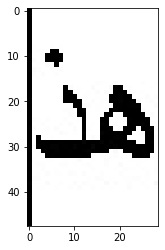

In [161]:
img = cv2.imread('chars/1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) 
(h,w) = thresh.shape

above_threshold = None
below_threshold = None

# Loop over all the rows to find the first row that contains no black pixels ABOVE the baseline
for row in range(0, baseline):
    row = baseline - row
    white_count = np.count_nonzero(thresh[row, :])
    
    if 0 not in thresh[row, :]:
        above_threshold = row
        break
        
        
# Loop over all the rows to find the first row that contains no black pixels Below the baseline
for row in range(baseline, h):
    white_count = np.count_nonzero(thresh[row, :])
    
    if 0 not in thresh[row, :]:
        below_threshold = row
        break

        
if type(above_threshold) is type(None) and type(above_threshold) is type(None):
    print('Both not found!')
    newThresh = thresh[:, :]
    
elif type(above_threshold) is not type(None) and type(above_threshold) is not type(None):
    print("Both found")
    newThresh = thresh[above_threshold:below_threshold, :]
    
else:
    if type(above_threshold) is type(None):
        print("Below found only")
        newThresh = thresh[0:below_threshold, :]
    else:
        print("Above found only")
        newThresh = thresh[above_threshold:, :]
        
        
    
plt.imshow(img)

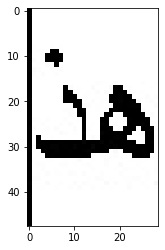

In [162]:
img = cv2.imread('chars/1.jpg')
plt.imshow(img)

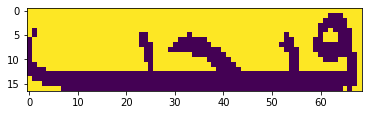

In [93]:
plt.imshow(thresh[15:32, :])

In [92]:
dots

[15, 32]

In [88]:
thresh[row, :].shape

(69,)

In [64]:
np.count_nonzero(thresh[:, col])

0

In [63]:
white_count

-28

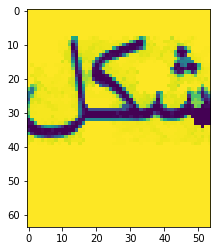

In [22]:
newimg = cv2.imread(f'words/186.png')
gray = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)))

cv2.drawContours(gray, cnts[8], 0, (0,255,0), 5)
plt.imshow(gray)

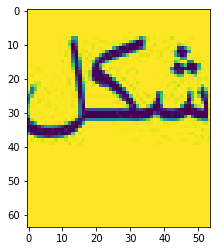

In [91]:
newimg = cv2.imread(f'words/186.png')
gray = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)

kernel = np.ones(2, 1), np.uint8)
  
# Using cv2.erode() method 
image = cv2.erode(gray, kernel) 
plt.imshow(image)

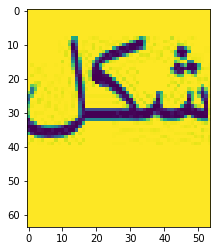

In [33]:
newimg = cv2.imread(f'words/186.png')
gray = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
baseline = 30
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)))
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)))

cv2.drawContours(gray,largeCnts[2] ,0 ,(0,0,255),2)
plt.imshow(gray)

'\nAfter getting all the cnts\nsort them by the edges and check bottom, right, left for a threshold of pixels to check if there are any black pixels, if exist then its not a dot.\nIf not exists then convert that region to white\n'

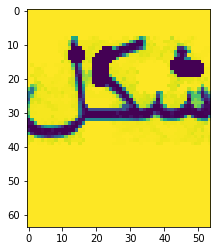

In [20]:
newimg = cv2.imread(f'words/186.png')
gray = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
baseline = 30
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)))
gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)))

cnts,hierarchy = cv2.findContours(gray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# Filter large size contours; at the end, there should only be one left
largeCnts = []
for cnt in cnts:
    if len(cnt) <= 4:
        check = False
        for edge in cnt:
            if edge[0][1] <= (baseline-10):
                #print(edge[0][1])
                check = True
            else:
                check = False
                break
            if check:
                cv2.drawContours(gray,[cnt],0,(0,0,255),2)
                largeCnts.append(cnt)
            
                
plt.imshow(gray)

'''
After getting all the cnts
sort them by the edges and check bottom, right, left for a threshold of pixels to check if there are any black pixels, if exist then its not a dot.
If not exists then convert that region to white
'''

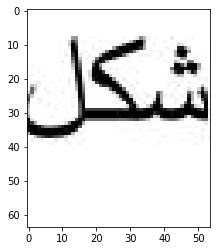

In [46]:
newimg = cv2.imread(f'words/186.png')
gray = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
baseline = 30
#gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)))
#gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 1)))


cv2.drawContours(gray,largeCnts[17] ,0 ,(0,0,255),5)
plt.imshow(newimg)

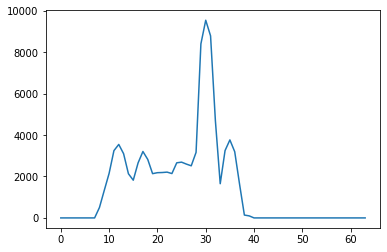

In [44]:

img = cv2.imread('words/186.png', 0)
img = 255-img

img_row_sum = np.sum(img,axis=1).tolist()

plt.plot(img_row_sum)
plt.show()

In [54]:
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.2, 0.1)
# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(output, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(output, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
	# show the output image
	cv2.imshow("output", np.hstack([image, output]))
	cv2.waitKey(0)

In [56]:
circles

In [48]:
plt.imshow(output)

NameError: name 'output' is not defined

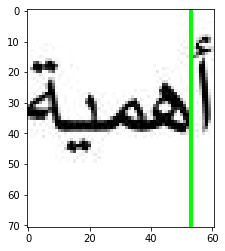

In [251]:
newimg = cv2.imread(f'words/26.png')
gray = cv2.cvtColor(newimg, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) 

(h,w) = thresh.shape
above_baseline_threshold = -1
under_baseline_threshold = 5
# Get all the column that have no black pixels above the baseline
final = []
for col in range(w):
    if col <= w-4 and col >= 4:
        above = thresh[:baseline, col][:above_baseline_threshold] 
        below = thresh[baseline:, col][under_baseline_threshold:]
        if 0 not in above and 0 not in below:
            final.append(col)
            
                
                

x = removeDup(final, 1)

remove_repeated = []

for index, col in enumerate(x):
    if index != len(x)-1:
        check = thresh[:baseline, col:x[index+1]][:above_baseline_threshold]
        if 0 not in check:
            remove_repeated.append(col)
        
for repeated in remove_repeated:
    x.remove(repeated)

for cut in x:
    cv2.line(newimg, (cut, 0), (cut,h), (0,255,0), 1)
plt.imshow(newimg)

In [231]:
p = [1,5,4,8,9]
p.remove(5)

In [232]:
p

[1, 4, 8, 9]

In [226]:
final_cut

[18]

In [194]:
x = removeDup(final, 2)

In [195]:
x

[5, 18, 34, 37]

In [189]:
final

[5, 6, 7, 18, 19, 20, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

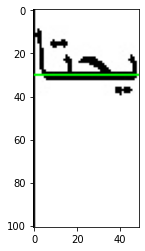

In [82]:
cv2.line(newimg, (0, 30), (w,30), (0,255,0), 1)
plt.imshow(newimg)

In [60]:
thresh[:baseline, 6][baseline_threshold:] = [0 for i in range(27)]

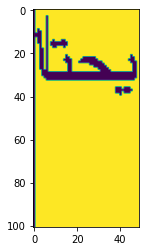

In [61]:
plt.imshow(thresh)

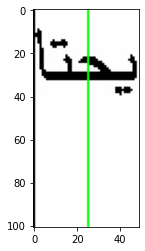

In [24]:
newimg = cv2.imread(f'chars/{image}')

cv2.line(newimg, (25, 0), (25,h), (0,255,0), 1)
plt.imshow(newimg)

In [9]:
'''
found = True
# Count of how many black should exist in a single column 
black_pixel_count_threshold = 3
# Count of black pixels that should be in series
black_pixel_occurance_threshold = 10
# How many rows below the baseline to check for black pixels(نقط)

# Save all the column indexes for cutting later
black_cut = []
for col in range(w):
    found = True
    # Get the count of zeros from the column
    black_count = thresh[:baseline, col].shape[0]- np.count_nonzero(thresh[:baseline, col])
    # Checker whether the black count is less than the threshold, if more it might not be a perfect cut
    if black_count <= black_pixel_count_threshold:
        if 0 not in thresh[baseline:, col][baseline_threshold:black_pixel_occurance_threshold]:
            if not col >= (w - 5):
                black_cut.append(col)
    


# Remove column indexes that are in series by adjusting the increment value, and remove duplicates
increment = 2
to_remove = set()
for x in black_cut:
    if x not in to_remove:
        for i in range(1, 1 + increment):
            to_remove.add(x - i)
            to_remove.add(x + i)

final = [x for x in black_cut if x not in to_remove]

final = []
for index, col in enumerate(final):
    for newindex, newcol in enumerate(final):
        if index != newindex or col < newcol:
            if index != len(final)-1:
                columns = thresh[baseline:, col:col+2][baseline_threshold:]
                if 0 not in column:
                    final.append(col)
            else:
                if 
                

for cut in final:
    cv2.line(newimg, (cut, 0), (cut,h), (0,255,0), 1)

plt.imshow(newimg)'''

'\nfound = True\n# Count of how many black should exist in a single column \nblack_pixel_count_threshold = 3\n# Count of black pixels that should be in series\nblack_pixel_occurance_threshold = 10\n# How many rows below the baseline to check for black pixels(نقط)\n\n# Save all the column indexes for cutting later\nblack_cut = []\nfor col in range(w):\n    found = True\n    # Get the count of zeros from the column\n    black_count = thresh[:baseline, col].shape[0]- np.count_nonzero(thresh[:baseline, col])\n    # Checker whether the black count is less than the threshold, if more it might not be a perfect cut\n    if black_count <= black_pixel_count_threshold:\n        if 0 not in thresh[baseline:, col][baseline_threshold:black_pixel_occurance_threshold]:\n            if not col >= (w - 5):\n                black_cut.append(col)\n    \n\n\n# Remove column indexes that are in series by adjusting the increment value, and remove duplicates\nincrement = 2\nto_remove = set()\nfor x in black_c

In [145]:
0 in thresh[baseline:, 15:25+2][baseline_threshold:]

True

In [136]:
m = [0,1,2,3,4,5,6,7,8,9]
m[1:3]

[1, 2]

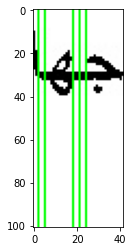

In [109]:
plt.imshow(newimg)

In [29]:
img = cv2.imread(f'chars/1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) 

(h,w) = thresh.shape
index = 0
baseline = 30

#final = getFinalCut(index, newimg, thresh, org_dim)
#cv2.line(newimg, (final[0], 0), (final[0], h), (0,255,0), 1)
#plt.imshow(newimg)

found = True
# Count of how many black should exist in a single column 
black_pixel_count_threshold = 2
# Count of black pixels that should be in series
black_pixel_occurance_threshold = 2

# Save all the column indexes for cutting later
black_count = [thresh[:baseline, col].shape[0]-np.count_nonzero(thresh[:baseline, col]) for col in range(w)]
white_count = [np.count_nonzero(thresh[:baseline, col]) for col in range(w)]
for col in range(w):
    found = True



# Remove column indexes that are in series by adjusting the increment value, and remove duplicates
increment = 2
to_remove = set()
for x in black_cut:
    if x not in to_remove:
        for i in range(1, 1 + increment):
            to_remove.add(x - i)
            to_remove.add(x + i)

final = [x for x in black_cut if x not in to_remove]
for cut in final:
    cv2.line(img, (cut, 0), (cut,h), (0,255,0), 1)
plt.imshow(img)

TypeError: unhashable type: 'list'

In [31]:
x = reject_outliers_2(np.array(black_count))

In [32]:
x

array([ 0,  2,  7, 11,  1,  0,  0,  0,  0,  5,  7,  7,  8,  7,  7,  6,  7,
        7,  7,  6,  6,  2,  0,  0,  0,  3,  7, 12,  9])

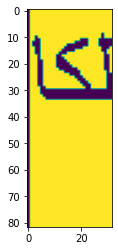

In [33]:
plt.imshow(thresh)

In [19]:
def reject_outliers_2(data, m=2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d / (mdev if mdev else 1.)
    return data[s < m]

In [18]:
black_cut

[[30, 0],
 [0, 30],
 [2, 28],
 [7, 23],
 [18, 12],
 [11, 19],
 [1, 29],
 [0, 30],
 [0, 30],
 [0, 30],
 [0, 30],
 [5, 25],
 [7, 23],
 [7, 23],
 [8, 22],
 [7, 23],
 [7, 23],
 [6, 24],
 [7, 23],
 [7, 23],
 [7, 23],
 [6, 24],
 [6, 24],
 [2, 28],
 [0, 30],
 [0, 30],
 [0, 30],
 [3, 27],
 [7, 23],
 [12, 18],
 [17, 13],
 [9, 21]]

In [122]:
img.shape

(82, 72, 3)

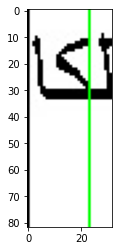

In [47]:
plt.imshow(img)

In [22]:
mm = np.array(blocks).flatten()
mm

/tmp/ipykernel_5473/3033974859.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mm = np.array(blocks).flatten()


array([list([23]), list([22]), list([32, 64])], dtype=object)

In [17]:
blocks

array([list([23]), list([22]), list([32, 64])], dtype=object)

# Vertical Projection

In [ ]:
img_path = '215.png'
img = cv2.imread(f'words/{img_path}', cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 

middle = []
white_cut = []
for value in range(len(white_pixel)):
    if value != len(white_pixel)-1:
        if white_pixel[value]+1 == white_pixel[value+1]:
            middle.append(white_pixel[value])
            
for white_index in range(len(middle)):
    if white_index != len(middle)-1:
        if middle[white_index]+1 == middle[white_index+1]:
            white_cut.append(middle[white_index+1])

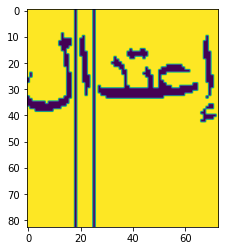

In [105]:
thresh[:, white_cut[0]] = [0 for i in range(h)]
thresh[:, white_cut[1]] = [0 for i in range(h)]
plt.imshow(thresh)

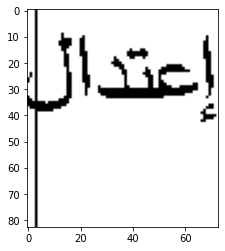

In [3]:
# how to split word by empty white spaces
# iterate normally from left to right by taking every y-axis and iterate over x-axis
# if the list if fully filled with white pixels, then append that index to list
# and do that for every column until you dont find a column with black pixels
# when column with black pixel is found, take the length of list and divide by 2 and round it, to take the white space from its middle
# when the middle is found, append the cut value in a list, then do all the operations on a loop over the whole word
# then find a way to split the image from the cut coordinates
img_path = '215.png'
img = cv2.imread(f'words/{img_path}', cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  
(h,w) = thresh.shape
white_pixel = []

for row in range(w):
    check = thresh[:, row]
    if 0 not in check:
        white_pixel.append(row)
    
thresh[:, 3] = [0 for i in range(h)]

plt.imshow(thresh, cmap='gray')

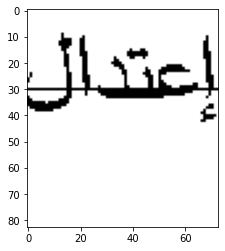

In [79]:
img_path = '215.png'
img = cv2.imread(f'words/{img_path}', cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  
(h,w) = thresh.shape
baselines = []
rows = []
word_baseline = 0
found_coord = []
sumed = []

# how to split word by empty white spaces
# iterate normally from left to right by taking every y-axis and iterate over x-axis
# if the list if fully filled with white pixels, then append that index to list
# and do that for every column until you dont find a column with black pixels
# when column with black pixel is found, take the length of list and divide by 2 and round it, to take the white space from its middle
# when the middle is found, append the cut value in a list, then do all the operations on a loop over the whole word
# then find a way to split the image from the cut coordinates

for col in range(0, h):
    found = 0
    tab = thresh[col, :]
    # calculate the sum of that row, the row with the lowest sum is the baseline, since the lowest one has more zeros (black pixels)
    sumed.append([np.sum(tab), col])
    '''for value in tab:
        if value == 0:
            found+=1
    found_coord.append(found)'''
    
#found_coord = list(reversed(found_coord))   

'''if found >= w - (20 / 100 * w):
        baselines.append(found)
        rows.append(col)
base_max = max(baselines)

for base in range(len(baselines)):
    if baselines[base] == base_max:
        word_baseline = rows[base]
        break'''
    
word_baseline = min(sumed)[1]
thresh[word_baseline, :] = [0 for i in range(w)]
plt.imshow(thresh,cmap='gray')

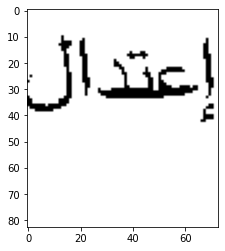

In [4]:
# Find highest point of each y-axis
img = cv2.imread(f'words/{img_path}', cv2.IMREAD_GRAYSCALE)
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) 
(h, w) = thresh.shape

first_occur = []
copy = thresh.copy()

word_baseline = []


for row in range(w):
    check = thresh[:, row]
    if 0 in check:
        
        for black in range(len(check)):
            if check[black] == 0:        
                first_occur.append([black, row])
                word_baseline.append(black)
                copy[black, row] = 255
                break

first_occur = first_occur[::-1]  
word_baseline = max(set(word_baseline), key = word_baseline.count)
#print(len(first_occur))
#plt.figure(figsize=(15,13))
#plt.subplot(1,2,1)
#plt.imshow(thresh, cmap='gray')

#plt.subplot(1,2,2)
plt.imshow(copy, cmap='gray')

In [5]:
copy = thresh.copy()
found = False

cut_coord = []
for coord in range(len(first_occur)):
    #print(first_occur[coord])
    #print(row)
    # line number 10 is the problem
    # becuase it goes negative aka one pixel to the left to find the baseline
    # but the baseline might be more than 1 pixel further
    # new update: the issue might be in the calculation of the baseline
    # finding the common y axis in the first_occur list might be a solution to find the baseline
    check = copy[: ,first_occur[coord][1]-1]
    if 0 in check:
        for black in range(len(check)):
            if check[black] == 0:
                if black == word_baseline and found == False:
                    #print('lol')
                    copy[black, first_occur[coord][1]-1] = 255
                    cut_coord.append(first_occur[coord][1]-1)
                    found = True
                    
                else:
                    #print(black)
                    #print(word_baseline)
                    #print(found)
                    #print('='*6)
                    #copy[: ,first_occur[coord][1]-1] = [255 for i in range(h)]
                    found = False
                    break

                

        
#plt.figure(figsize=(15,13))

#plt.subplot(1,2,1)
#plt.imshow(thresh, cmap='gray')

#plt.subplot(1,2,2)
#plt.imshow(copy, cmap='gray')

In [8]:
folder

'215'

In [7]:
cut+1

1

first


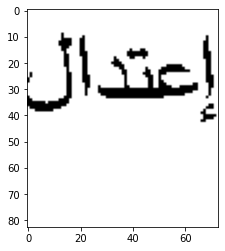

In [6]:
folder = img_path.split('.')[0]
os.makedirs(f'chars/{folder}')

final = []
for value in range(len(cut_coord)):
    if value != 0:
        if cut_coord[value]+1 != cut_coord[value-1]:
            final.append(cut_coord[value-1])
            
# Split and save the chars          
for cut in range(len(final)):
    if cut == 0:
        char = thresh[:, final[cut]:]
        cv2.imwrite(f'chars/{folder}/{cut}.jpg', char)
        print('first')
    else:
        print('middle')
        char = thresh[:, final[cut] : final[cut-1]]
        cv2.imwrite(f'chars/{folder}/{cut}.jpg', char)
 
char = thresh[:, :final[cut]]    
cv2.imwrite(f'chars/{folder}/{cut+1}.jpg', char)
plt.imshow(thresh, cmap='gray')

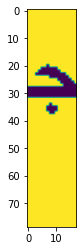

In [459]:
plt.imshow(thresh[:, final[2]:final[1]])

first
middle
middle


True

0
1
2


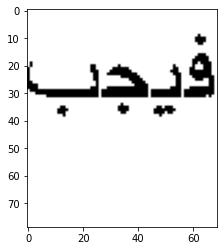

In [448]:
for cut in range(len(final)):
    print(cut)
    copy[:, final[cut]] = 255
    
plt.imshow(copy, cmap='gray')
plt.savefig('demo.jpg')

In [ ]:
# Split the image into chars


In [215]:
# old approach to find black pixels

above_baseline = thresh[word_baseline-1, :]
white_indexes = []

for value in range(len(above_baseline)):
    if above_baseline[value] == 255:
        white_indexes.append(value)
        
rev = list(reversed(white_indexes))

filtered_coord = []
for value in range(len(white_indexes)):
    try:
        right = thresh[word_baseline-1, white_indexes[value]+1]
    except:
        pass
        
    if right == 0:
        filtered_coord.append(white_indexes[value])
# generate results on multiple images

28

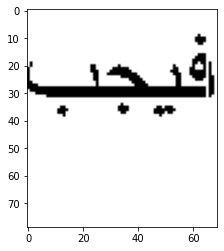

In [90]:
thresh[:, 65] = [255 for i in range(79)]
plt.imshow(thresh, cmap='gray')

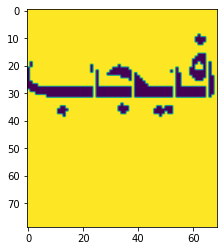

In [50]:
for col in filtered_coord:
    thresh[:, col] = 255
    
plt.imshow(thresh)

In [14]:
len(white_indexes)

55

In [113]:
len(above_baseline)

69

In [112]:
len(white_indexes)

55

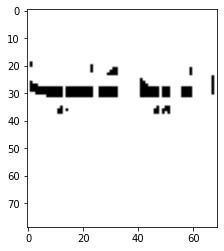

In [133]:
img = cv2.imread('words/37.png', cv2.IMREAD_GRAYSCALE)

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  
(h,w) = thresh.shape
baseline = 0


for row in range(0, w):
    found = 0
    for column in range(0, h):
        if thresh[column, row] == 0:
            found+=1
            
    #print(f'row: {row}')
    #print(found)        
    if found >= 8:
        baseline = row
        thresh[:, baseline] = [255 for i in range(thresh.shape[0])]
        
        
        

plt.imshow(thresh, cmap='gray')

In [131]:
thresh.shape

(79, 69)

In [130]:
thresh[:, baseline].shape

(79,)

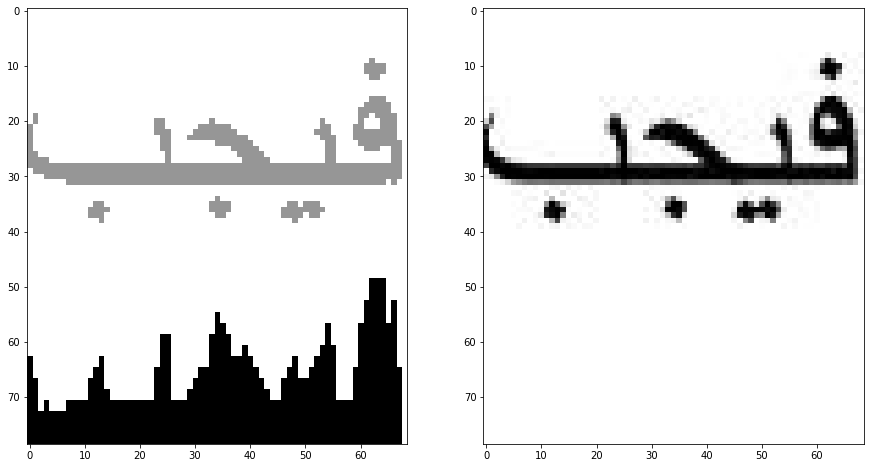

In [45]:
img = cv2.imread('words/37.png', cv2.IMREAD_GRAYSCALE)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  
(h,w)=thresh1.shape 
a = [0 for z in range(0, w)]

# Convert the blacks to white
for j in range(0,w): 
    for i in range(0,h):  
        if  thresh1[i,j]==0:  
            a[j]+=2        
            thresh1[i,j]=0  

for j  in range(0,w): 
    for i in range((h-a[j]),h):  
        thresh1[i,j]=
        
plt.figure(figsize=(15,13))
plt.subplot(1,2,1)
plt.imshow(thresh1, cmap='gray')

plt.subplot(1,2,2)
plt.imshow(img, cmap='gray')
plt.savefig('horizontal-projection(new).jpg')

# Back-Projection

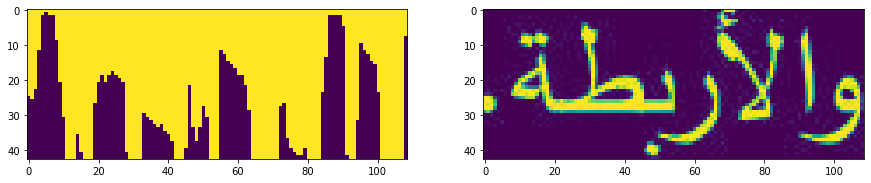

In [3]:
import numpy as np

# Load as greyscale
im = cv2.imread('word.png', cv2.IMREAD_GRAYSCALE)

# Invert
im = 255 - im

# Calculate horizontal projection
proj = np.sum(im, 0)

# Create output image same height as text, 500 px wide
m = np.max(proj)
w = im.shape[1]
result = np.zeros((im.shape[0], proj.shape[0]))

# Draw a line for each row
for row in range(im.shape[1]):
    #print(int(proj[row]*w/m))
    cv2.line(result, (row, 0), (row, int(proj[row]*w/m)), (255,255,255), 1)

# Save result
plt.figure(figsize=(15,13))
plt.subplot(1,2, 1)
plt.imshow(result)

plt.subplot(1,2, 2)
plt.imshow(im)

plt.savefig('vertical-projection.jpg')

In [16]:
src = cv2.imread('word.png')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

ch = (0, 0)
# create an empty array
hue = np.empty(hsv.shape, hsv.dtype)
# mix all the arrays
cv2.mixChannels([hsv], [hue], ch)

## [Create Trackbar to enter the number of bins]
window_image = 'Source image'
cv2.namedWindow(window_image)
bins = 25
cv2.createTrackbar('* Hue  bins: ', window_image, bins, 180, Hist_and_Backproj )
Hist_and_Backproj(bins)
## [Create Trackbar to enter the number of bins]

## [Show the image]
cv2.imshow(window_image, src)
cv2.waitKey()
## [Show the image]

113

In [15]:
def Hist_and_Backproj(val):
    ## [initialize]
    bins = val
    histSize = max(bins, 2)
    ranges = [0, 180] # hue_range
    ## [initialize]

    ## [Get the Histogram and normalize it]
    hist = cv2.calcHist([hue], [0], None, [histSize], ranges, accumulate=False)
    cv2.normalize(hist, hist, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    ## [Get the Histogram and normalize it]

    ## [Get Backprojection]
    backproj = cv2.calcBackProject([hue], [0], hist, ranges, scale=1)
    ## [Get Backprojection]

    ## [Draw the backproj]
    cv2.imshow('BackProj', backproj)
    ## [Draw the backproj]

    ## [Draw the histogram]
    w = 400
    h = 400
    bin_w = int(round(w / histSize))
    histImg = np.zeros((h, w, 3), dtype=np.uint8)

    for i in range(bins):
        cv2.rectangle(histImg, (i*bin_w, h), ( (i+1)*bin_w, h - int(np.round( hist[i]*h/255.0 )) ), (0, 0, 255), cv2.FILLED)

    plt.imshow(histImg)

# Sentence Seg

In [50]:
img = cv2.imread('data/3.jpg')

# define border color
lower = (0, 80, 110)
upper = (0, 120, 150)

# threshold on border color
mask = cv2.inRange(img, lower, upper)
# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# otsu threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 30))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph = 255 - morph

bboxes_img = img.copy()
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
contours = contours[0] if len(contours) == 2 else contours[1]
for index, cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(bboxes_img, (x,y), (x+w, y+h), (0,255,2), 2)
    #roi = bboxes_img[y-10:y+w, x:x+w]
    #cv2.imwrite(f'words/{index}.png', roi)
    
cv2.imwrite('sentence-seg.jpg', bboxes_img)

True

# Word seg

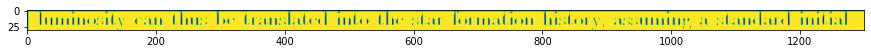

In [14]:
img = cv2.imread('sentence.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

dilate = cv2.dilate(gray, (5,1), iterations=3)

plt.figure(figsize=(15,13))
plt.imshow(dilate)

In [40]:
img = cv2.imread('data/3.jpg')

# define border color
lower = (0, 80, 110)
upper = (0, 120, 150)

# threshold on border color
mask = cv2.inRange(img, lower, upper)
# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# otsu threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph = 255 - morph

bboxes_img = img.copy()
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
contours = contours[0] if len(contours) == 2 else contours[1]
for index, cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    roi = bboxes_img[y-10:y+w, x:x+w]
    cv2.imwrite(f'words/{index}.png', roi)
    


## Char seg

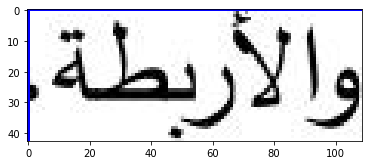

In [3]:
word = cv2.imread('word.png')
copy = word.copy()
word = cv2.cvtColor(word, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(word, 0, 255, cv2.THRESH_OTSU )[1] 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
contours = contours[0] if len(contours) == 2 else contours[1]
done = 0
for cntr in contours:
    done+=1
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(copy, (x, y), (x+w, y+h), (0, 0, 255), 1)

plt.imshow(copy, cmap='gray')

# New

In [26]:
def binary_otsus(image, filter:int=1):
    if len(image.shape) == 3:
        gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        gray_img = image

    # Otsus Binarization
    if filter != 0:
        blur = cv.GaussianBlur(gray_img, (3,3), 0)
        binary_img = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1]
    else:
        binary_img = cv.threshold(gray_img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)[1]
    
    # Morphological Opening
    # kernel = np.ones((3,3),np.uint8)
    # clean_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel)

    return binary_img

def projection_segmentation(clean_img, axis, cut=3):
    
    segments = []
    start = -1
    cnt = 0

    projection_bins = projection(clean_img, axis)
    for idx, projection_bin in enumerate(projection_bins):

        if projection_bin != 0:
            cnt = 0
        if projection_bin != 0 and start == -1:
            start = idx
        if projection_bin == 0 and start != -1:
            cnt += 1
            if cnt >= cut:
                if axis == 'horizontal':
                    segments.append(clean_img[max(start-1, 0):idx, :])
                elif axis == 'vertical':
                    segments.append(clean_img[:, max(start-1, 0):idx])
                cnt = 0
                start = -1
    
    return segments



def preprocess(image):

    # Maybe we end up using only gray level image.
    gray_img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray_img = cv.bitwise_not(gray_img)

    binary_img = binary_otsus(gray_img, 0)
    # cv.imwrite('origin.png', gray_img)

    # deskewed_img = deskew(binary_img)
    deskewed_img = deskew(binary_img)
    # cv.imwrite('output.png', deskewed_img)

    # binary_img = binary_otsus(deskewed_img, 0)
    # breakpoint()

    # Visualize

    # breakpoint()
    return deskewed_img

def save_image(img, folder, title):
    cv.imwrite(f'./{folder}/{title}.png', img)

def word_vertical_projection(line_image, cut=3):
    
    line_words = projection_segmentation(line_image, axis='vertical', cut=cut)
    line_words.reverse()
    
    return line_words

def line_horizontal_projection(image, cut=3):

    # Preprocess input image
    clean_img = preprocess(image)


    # Segmentation    
    lines = projection_segmentation(clean_img, axis='horizontal', cut=cut)

    return lines

def extract_words(img, visual=0):

    lines = line_horizontal_projection(img)
    words = []
    
    for idx, line in enumerate(lines):
        
        if visual:
            save_image(line, 'lines', f'line{idx}')

        line_words = word_vertical_projection(line)
        for w in line_words:
            # if len(words) == 585:
            #     print(idx)
            words.append((w, line))
        # words.extend(line_words)

    # breakpoint()
    if visual:
        for idx, word in enumerate(words):
            save_image(word[0], 'words', f'word{idx}')

    return words

In [27]:
img = cv2.imread('data/1.jpg')
words = extract_words(img)

In [7]:
images = convert_from_path('6.pdf')
index = 0
images[3].save('data/1.jpg')
images[4].save('data/2.jpg')
images[5].save('data/3.jpg')

In [149]:
img = cv2.imread('data/3.jpg')

# define border color
lower = (0, 80, 110)
upper = (0, 120, 150)

# threshold on border color
mask = cv2.inRange(img, lower, upper)
# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# otsu threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph = 255 - morph

bboxes_img = img.copy()
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(bboxes_img, (x, y), (x+w, y+h), (0, 0, 255), 1)
    
cv2.imwrite('word-seg.png', bboxes_img)

True

In [13]:
img.shape

(2339, 1654, 3)

In [29]:
word.shape[0]/2

21.5

In [ ]:
word = cv2.imread('word.png')
copy = word.copy()
word = cv2.cvtColor(word, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(word, 0, 255, cv2.THRESH_OTSU )[1] 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

contours = cv2.findContours(morph, cv2.REq, cv2.CHAIN_APPROX_TC89_L1)
contours = contours[0] if len(contours) == 2 else contours[1]
done = 0
for cntr in contours:
    done+=1
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(copy, (x, y), (x+w, y+h), (0, 0, 255), 1)

plt.imshow(copy, cmap='gray')

left: (7, 23)
right: (55, 28)
top: (28, 4)
bottom: (21, 30)


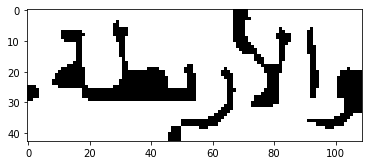

In [4]:
plt.imshow(morph, cmap='gray')

In [50]:
cv2.boundingRect(cntr)

error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'boundingRect'
> Overload resolution failed:
>  - array is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'array'


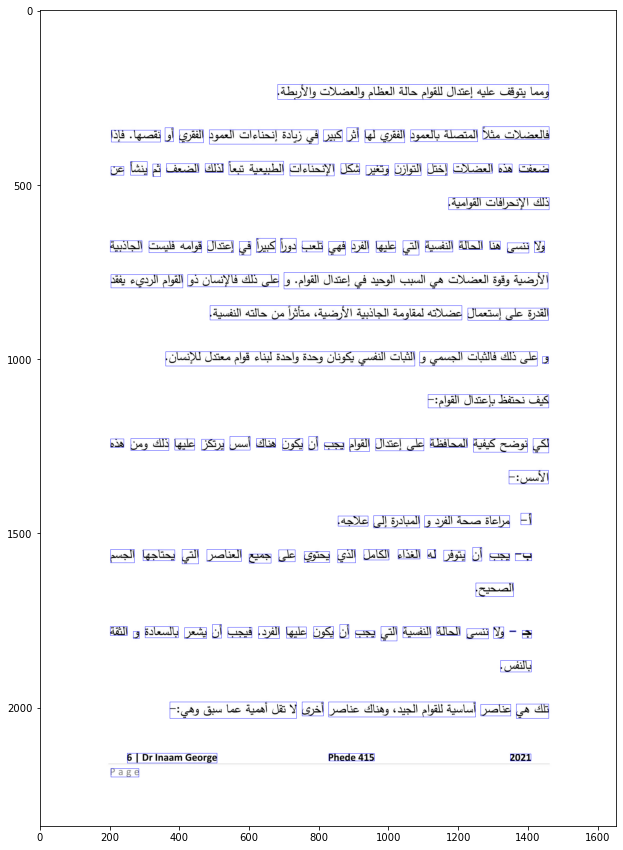

In [75]:
plt.figure(figsize=(13,15))
plt.imshow(bboxes_img)

In [52]:
import cv2
import numpy as np

# read input image
img = cv2.imread('data/3.jpg')

# define border color
lower = (0, 80, 110)
upper = (0, 120, 150)

# threshold on border color
mask = cv2.inRange(img, lower, upper)

# dilate threshold
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
mask = cv2.morphologyEx(mask, cv2.MORPH_DILATE, kernel)

# recolor border to white
img[mask==255] = (255,255,255)

# convert img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# otsu threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU )[1] 

# apply morphology open
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (17,17))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
morph = 255 - morph

# find contours and bounding boxes
bboxes = []
bboxes_img = img.copy()
contours = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_TC89_L1)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(bboxes_img, (x, y), (x+w, y+h), (0, 0, 255), 1)
    bboxes.append((x,y,w,h))

# get largest width of bboxes
maxwidth = max(bboxes)[2]

# sort bboxes on x coordinate
def takeFirst(elem):
    return elem[0]

bboxes.sort(key=takeFirst)

# stack cropped boxes with 10 pixels padding all around
result = np.full((1,maxwidth+20,3), (255,255,255), dtype=np.uint8)
for bbox in bboxes:
    (x,y,w,h) = bbox
    crop = img[y-10:y+h+10, x-10:x+maxwidth+10]
    result = np.vstack((result, crop))

# save result
cv2.imwrite("abcd_test_mask.jpg", mask)
cv2.imwrite("abcd_test_white_border.jpg", img)
cv2.imwrite("abcd_test_thresh.jpg", thresh)
cv2.imwrite("abcd_test_morph.jpg", morph)
cv2.imwrite("abcd_test_bboxes.jpg", bboxes_img)
cv2.imwrite("abcd_test_column_stack.png", result)


True

image = cv2.imread('data/3.jpg')
#cv2.imshow('orig',image)
#cv2.waitKey(0)

#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


#binary
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

#dilation
kernel = np.ones((5,100), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)

#find contours
ctrs, im2, = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y+h, x:x+w]

    # show ROI
    #cv2.imwrite("segment_no_"+str(i)+".png",roi)
    cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)


cv2.imwrite('final_bounded_box_image2.png',image)

In [49]:
q,w,e,r = cv2.boundingRect(sorted_ctrs[0])

In [50]:
q

152

In [4]:
images = convert_from_path('2.pdf')
index = 0
for img in images:
    img.save(f'data/{index}.jpg')
    index+=1

In [9]:
image = cv2.imread('data/1.jpg')

gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_img = cv2.bitwise_not(gray_img)

blur = cv2.GaussianBlur(gray_img, (3,3), 0)
binary_img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]


deskewed_img = deskew(binary_img)

lines = projection_segmentation(clean_img, axis='horizontal', cut=cut)

In [19]:
def projection_segmentation(clean_img, axis, cut=3):
    
    segments = []
    start = -1
    cnt = 0

    projection_bins = projection(clean_img, axis)
    for idx, projection_bin in enumerate(projection_bins):

        if projection_bin != 0:
            cnt = 0
        if projection_bin != 0 and start == -1:
            start = idx
        if projection_bin == 0 and start != -1:
            cnt += 1
            if cnt >= cut:
                if axis == 'horizontal':
                    segments.append(clean_img[max(start-1, 0):idx, :])
                elif axis == 'vertical':
                    segments.append(clean_img[:, max(start-1, 0):idx])
                cnt = 0
                start = -1
    
    return segments


def projection(gray_img, axis:str='horizontal'):
    """ Compute the horizontal or the vertical projection of a gray image """

    if axis == 'horizontal':
        projection_bins = np.sum(gray_img, 1).astype('int32')
    elif axis == 'vertical':
        projection_bins = np.sum(gray_img, 0).astype('int32')

    return projection_bins


def find_score(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score


def deskew(binary_img):
    ht, wd = binary_img.shape
    # _, binary_img = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

    # pix = np.array(img.convert('1').getdata(), np.uint8)
    bin_img = (binary_img // 255.0)

    delta = 0.1
    limit = 3
    angles = np.arange(-limit, limit+delta, delta)
    scores = []
    for angle in angles:
        hist, score = find_score(bin_img, angle)
        scores.append(score)

    best_score = max(scores)
    best_angle = angles[scores.index(best_score)]
    # print('Best angle: {}'.formate(best_angle))

    # correct skew
    data = inter.rotate(bin_img, best_angle, reshape=False, order=0)
    img = im.fromarray((255 * data).astype("uint8"))

    # img.save('skew_corrected.png')
    pix = np.array(img)
    
    return pix

In [6]:
img = cv2.imread('1.png')

#Create default parametrization LSD
lsd = cv2.createLineSegmentDetector(1)

#Detect lines in the image
lines = lsd.detect(img)[0] #Position 0 of the returned tuple are the detected lines

#Draw detected lines in the image
drawn_img = lsd.drawSegments(img,lines)

error: OpenCV(4.5.3) /tmp/pip-req-build-afu9cjzs/opencv/modules/imgproc/src/lsd.cpp:143: error: (-213:The function/feature is not implemented) Implementation has been removed due original code license issues in function 'LineSegmentDetectorImpl'


In [49]:
thresh.shape

(156, 324)

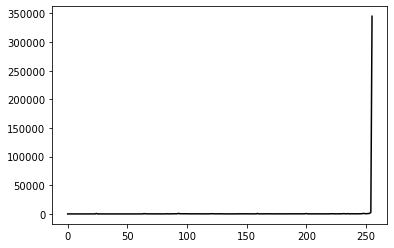

In [85]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('Screenshot from 2022-01-12 13-55-47.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

plt.plot(histogram, color='k')
plt.show()

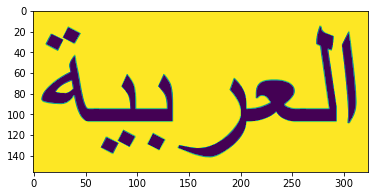

In [81]:
plt.imshow(gray_image)

In [44]:
horizontal_hist = np.sum(gray,axis=1,keepdims=True)/255
horizontal_hist = img.shape[1] - np.sum(img,axis=1,keepdims=True)/255

In [37]:
# img be binarized image of size height x width and foregound pixel is white i.e pixel value = 255
vertical_hist = np.sum(img,axis=0,keepdims=True)/255
# axis = 0is used to take sum along the column
# vertical_hist is an array of size 1 x width# If the img has foreground pixel as black i.e pixel value = 0
vertical_hist = img.shape[0] - np.sum(img,axis=0,keepdims=True)/255
# Logic :- No.of rows - No.of white pixels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


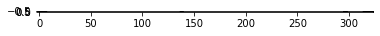

In [38]:
plt.imshow(vertical_hist)

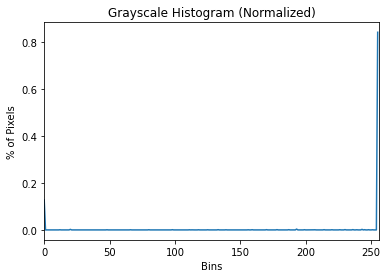

In [30]:
hist /= hist.sum()
# plot the normalized histogram
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

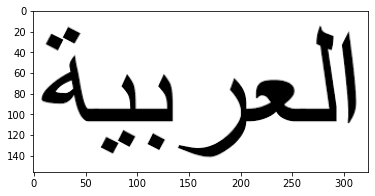

In [29]:
plt.imshow(img)

In [15]:
img = cv2.imread('1.png')

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray, 5)

In [17]:
# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

In [19]:
# apply some dilation and erosion to join the gaps
thresh = cv2.dilate(thresh,None,iterations = 3)
thresh = cv2.erode(thresh,None,iterations = 2)

In [21]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [22]:
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

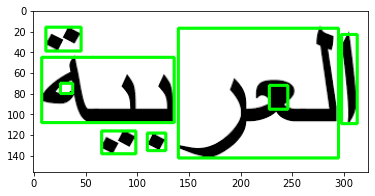

In [24]:
plt.imshow(img)

In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

In [11]:
url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-printed and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
generated_text

'INDLUS THE'

In [13]:
image = Image.open('arabic.jpg').convert("RGB")
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [14]:
generated_text

'AMOUNT'

In [4]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
reader = easyocr.Reader(['ar']) 
result = reader.readtext('data/20211108_231404.jpg')
#print(result)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [11]:
img = cv2.imread('data/20211108_231404.jpg')
img.shape

(4032, 3024, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


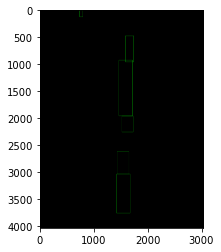

In [12]:
blank = np.zeros((img.shape[0], img.shape[1], 3))

for index in range(len(result)):
    coord = result[index][0]
    x1 = coord[-1][0]
    y1 = coord[-1][1]
    #print(f'x1: {x1} ===== y1: {y1}')
    x2 = coord[1][0]
    y2 = coord[1][1]
    #print(f'x2: {x2} ===== y2: {y2}')
    
    cv2.rectangle(blank, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)

plt.imshow(blank)        
    

# Result to TXT

In [14]:
final = ''

for block in result:
    final = final + block[1] + ' '


In [15]:
with open('result/2.txt', 'w', encoding='utf8') as file:
    file.write(final)
    file.close()